In [1]:
import os
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [2]:
#!pip install wordcloud

In [3]:
import numpy as np
 
import matplotlib.pyplot as plt
% matplotlib inline

import PIL as pillow
#import worldcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd


In [4]:

import nltk
from nltk.tokenize import word_tokenize # as wt
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#this is sample data
from nltk.corpus import names  

from string import punctuation

#if the next cell does not work
#remove number symbol on following lines and re-run this cell
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('names')
nltk.download('stopwords')
nltk.download('vader_lexicon')



C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
os.getcwd()

'C:\\Users\\GBTC406015ur\\Documents'

In [6]:
df = pd.read_excel('.\datasets\one year of twitter suicide  tweets.xlsx')

In [7]:
df.head()

,content
0,If you or someone you know is struggling or in...
1,Iâ€™ve thinking about suicide every single day...
2,This is how you write a headline.
3,How is suicide the biggest killer of boys unde...
4,Someone might need these contacts today: \n\nS...


In [74]:
df.count()

content    1856
dtype: int64

In [75]:
#dataframe that does not (~) h

df_play = df[~df.content.str.contains('Sri')]
df_play = df_play[~df.content.str.contains('Lan*')]
df_play = df_play[~df.content.str.contains('bombers')]
df_play = df_play[~df.content.str.contains('killed')]
df_play = df_play[~df.content.str.contains('bombing')]
df_play = df_play[~df.content.str.contains('attacks')]
df_play = df_play[~df.content.str.contains('easter')]
df_play = df_play[~df.content.str.contains('Sunday')]
df_play = df_play[~df.content.str.contains('lan*')]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages

In [76]:
df_play.count()

content    913
dtype: int64

In [77]:
df_play.head()

,content
0,If you or someone you know is struggling or in...
1,Iâ€™ve thinking about suicide every single day...
2,This is how you write a headline.
3,How is suicide the biggest killer of boys unde...
4,Someone might need these contacts today: \n\nS...


In [60]:
df_play.count()

content    1473
dtype: int64

In [ ]:
df.dropna()

In [9]:
df_content = df[['content']]

In [10]:
df_content.head()

,content
0,If you or someone you know is struggling or in...
1,Iâ€™ve thinking about suicide every single day...
2,This is how you write a headline.
3,How is suicide the biggest killer of boys unde...
4,Someone might need these contacts today: \n\nS...


In [11]:
string = []

#for item in content['].items():
#    string.append[item]

my_string = ' '.join(df_content['content'].tolist())

In [12]:
wctext = my_string.lower()

In [13]:
tknz_wct = word_tokenize(wctext)

In [14]:
len(tknz_wct)

67988

In [15]:
tknz_wct[:10]

['if', 'you', 'or', 'someone', 'you', 'know', 'is', 'struggling', 'or', 'in']

In [16]:
fd_wct = FreqDist(tknz_wct)
fd_wct

FreqDist({'if': 167,
          'you': 471,
          'or': 157,
          'someone': 82,
          'know': 85,
          'is': 740,
          'struggling': 17,
          'in': 1078,
          'crisis': 60,
          ',': 1857,
          'are': 352,
          'not': 270,
          'alone': 23,
          '.': 2598,
          'our': 129,
          'partner': 4,
          'lifeline': 22,
          '@': 496,
          '800273talk': 7,
          'can': 135,
          'help': 95,
          'iâ€™ve': 13,
          'thinking': 10,
          'about': 211,
          'suicide': 1860,
          'every': 63,
          'single': 12,
          'day': 98,
          'i': 503,
          'hate': 13,
          'myself': 15,
          'and': 987,
          'want': 44,
          'to': 1425,
          'be': 272,
          'cut': 9,
          'into': 58,
          'pieces': 7,
          'one': 214,
          'way': 46,
          'do': 161,
          'this': 398,
          '...': 114,
          'how': 108,
    

In [17]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
#remove the punctuation
for word in tknz_wct:
    if word in punctuation:
        tknz_wct.remove(word)

In [19]:
len(tknz_wct)

60203

In [20]:
eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
rm_count = 0
new_words = []

for word in tknz_wct:
    if word not in eng_stopwords:# or "'s" or '``' or "''":
        new_words.append(word)
    else:
        rm_count += 1

In [22]:
len(new_words)

37986

In [23]:
rm_count

22217

In [24]:
fd_nw = FreqDist(new_words)
fd_nw.most_common(200)

[('suicide', 1860),
 ('sri', 330),
 ("'s", 295),
 ('people', 236),
 ('lanka', 235),
 ('one', 214),
 ('bombers', 202),
 ('#', 195),
 ('https', 194),
 ("''", 185),
 ('``', 148),
 ('bomber', 142),
 ('commit', 134),
 ("n't", 123),
 ('attacks', 121),
 ('â€¦', 120),
 ('please', 116),
 ('...', 114),
 ('mental', 114),
 ('easter', 112),
 ('life', 111),
 ('health', 104),
 ('killed', 102),
 ('like', 101),
 ('committed', 100),
 ('would', 99),
 ('day', 98),
 ('veterans', 98),
 ('help', 95),
 ('@', 93),
 ('police', 89),
 ('lankan', 88),
 ('bombings', 86),
 ('know', 85),
 ('need', 84),
 ('someone', 82),
 ('died', 81),
 ('children', 80),
 ('death', 79),
 ('years', 76),
 ('sunday', 76),
 ('many', 74),
 ('http', 73),
 ('attack', 73),
 ('srilanka', 72),
 ('us', 72),
 ('prevention', 70),
 ('men', 70),
 ('today', 69),
 ('says', 68),
 ('!', 68),
 ('never', 67),
 ('22', 67),
 ('get', 67),
 ('family', 65),
 ('every', 63),
 ('depression', 63),
 ('crisis', 60),
 ('national', 60),
 ('time', 59),
 ('itâ€™s', 58),

In [25]:
rm_count = 0
final_words = []

for ugly_word in new_words:
    if ugly_word in ["'s","''",'``','@', '', 'â€¦','â€™' ,'”', '.','(',"'m", 'itâ€™s', '!', 'itâ€™s']:
        ugly_word = ' '
        final_words.append(ugly_word)
    #elseif ugly_word == 
    else:
        final_words.append(ugly_word)
        rm_count += 1

In [26]:
fd_nwFinal = FreqDist(final_words)
fd_nwFinal.most_common(100)

[('suicide', 1860),
 (' ', 1118),
 ('sri', 330),
 ('people', 236),
 ('lanka', 235),
 ('one', 214),
 ('bombers', 202),
 ('#', 195),
 ('https', 194),
 ('bomber', 142),
 ('commit', 134),
 ("n't", 123),
 ('attacks', 121),
 ('please', 116),
 ('...', 114),
 ('mental', 114),
 ('easter', 112),
 ('life', 111),
 ('health', 104),
 ('killed', 102),
 ('like', 101),
 ('committed', 100),
 ('would', 99),
 ('day', 98),
 ('veterans', 98),
 ('help', 95),
 ('police', 89),
 ('lankan', 88),
 ('bombings', 86),
 ('know', 85),
 ('need', 84),
 ('someone', 82),
 ('died', 81),
 ('children', 80),
 ('death', 79),
 ('years', 76),
 ('sunday', 76),
 ('many', 74),
 ('http', 73),
 ('attack', 73),
 ('srilanka', 72),
 ('us', 72),
 ('prevention', 70),
 ('men', 70),
 ('today', 69),
 ('says', 68),
 ('never', 67),
 ('22', 67),
 ('get', 67),
 ('family', 65),
 ('every', 63),
 ('depression', 63),
 ('crisis', 60),
 ('national', 60),
 ('time', 59),
 ('two', 58),
 ('friends', 57),
 ('uk', 57),
 ('love', 55),
 ('think', 54),
 ('year

In [27]:
len(fd_nwFinal)

9583

In [28]:
fd_nwFinal

FreqDist({'someone': 82,
          'know': 85,
          'struggling': 17,
          'crisis': 60,
          'alone': 23,
          'partner': 4,
          'lifeline': 22,
          '800273talk': 7,
          'help': 95,
          'iâ€™ve': 13,
          'thinking': 10,
          'suicide': 1860,
          'every': 63,
          'single': 12,
          'day': 98,
          'hate': 13,
          'want': 44,
          'cut': 9,
          'pieces': 7,
          'one': 214,
          'way': 46,
          '...': 114,
          'write': 8,
          'headline': 1,
          'biggest': 16,
          'killer': 10,
          'boys': 15,
          '30': 10,
          'country': 31,
          ' ': 1118,
          'never': 67,
          'talked': 1,
          'absolute': 3,
          'sin': 8,
          'might': 21,
          'need': 84,
          'contacts': 4,
          'today': 69,
          '0800567567': 5,
          'rape': 9,
          '0214479762': 5,
          'assault': 10,
          '086

In [29]:
type(fd_nwFinal)

nltk.probability.FreqDist

In [30]:
type(final_words)

list

In [31]:
#creating a string/text file with join statement
finalList = ' '.join(final_words)

In [32]:
finalList

"someone know struggling crisis alone partner lifeline 800273talk help iâ€™ve thinking suicide every single day hate want cut pieces one way ... write headline suicide biggest killer boys 30 country   never talked absolute sin someone might need contacts today suicide 0800567567 rape 0214479762 assault 0861322322 depression 0800121314 emergency 112 adhd helpline 0800554433 trauma line 0800205026 mental health line 0112344837 rippieterhowes pieterhowes fuck everyone dumb shit say suicide fucking hate selfish ass mfs friends prayer request way minister family whose adult son died suicide please ask godâ€™s loving presence thx appreciated hey folks launched gofundme campaign raise money one trailer park friends   desperate need medical help please check please retweet share dah agak dah cerita ni lebih promote suicide dari bring awareness tapi masa tweet kata tak best many came defence distraught mother warns netflix   13 reasons daughter 12 took lifeâ daily mail online depression isnâ€™t

In [33]:
sid = SentimentIntensityAnalyzer()

In [34]:
sid.polarity_scores(finalList)

{'compound': -1.0, 'neg': 0.343, 'neu': 0.531, 'pos': 0.127}

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [36]:
#I have to create an instance
wordcloud = WordCloud()
wc = wordcloud.generate(finalList)

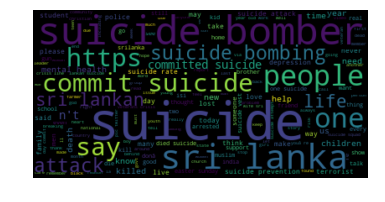

In [37]:
# Display the generated imaged
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

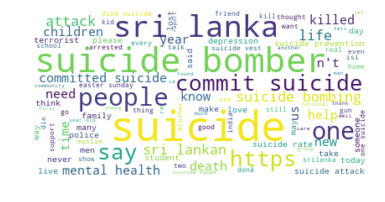

In [38]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(finalList)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()